# Data Science Nanodegree - Blog Post
Created By: Renan Vieira Dias  
https://review.udacity.com/#!/rubrics/1507/view

--- 

### Article Title: What data tells about data jobs

- KeyWords: Data, Job, Work, Employ, Skills, Language, Salary, Experience, Seniority, Languages, Database, Technologies 
 - Brain Storm:
    - Requirements for Data Jobs
    - Data Jobs tools
    - What Data tells about Data Jobs
    - How much each skill is worth it on data
    - Technologies for Data Analyst, Data Science, Data Engineer, Database Administrator
    - Technologies for Data Jobs

### Questions
  
- **Which skills and technologies each data job require?**  
    The goal with this question is to understand which Languages, Databases, Platforms, Web Framework and Dev Environment is used by each data job. The questions on the survey that contains this information are: *['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith', 'DevEnviron', 'OpSys']*
 
 
- **How is the distribution of salary in the top respondents countries?**  
    This question is to understand how the market is paying these jobs, and you understand your position in it. The information is on the foolowing questions: *['ConvertedComp', 'WorkWeekHrs']*. The segment is *['Country']*
  
  
- **How much is worth each skill/technology/education in dollar per hours?**  
    The goal is to make a predictor of salary based on your knowledge and skills. The model target will be made on **Dollar per hour**: *['ConvertedComp', 'WorkWeekHrs']*. While the features will be only the subset of skill/technology/education, years of experience and country: *['YearsCodePro', 'Country', 'EdLevel', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith', 'DevEnviron', 'OpSys']*

#### Segment and Filter  
    Our Study will be focused only on data developers: *['Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Engineer, data']* and on the employed developers: *['Employed full-time','Employed part-time']*

### Imports

In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

### Defined Functions

In [34]:
def optionIsInCell(cell, option):
    ''' Check if the option is in the cell and return an boolean in the int format.
    input:
        cell (String)
        Option (String)
    
    output:
        1 - The option is in the cell value
        0 - The option is not in the cell value
    '''
    if str(cell).find(option)!=-1:
        return 1
    return 0

In [35]:
def transformingColumnByOptions(df, column, options, prefix = False, separator='_'):
    ''' Create one column for each answer inside an multiple-selection answer
    input:
        df (dataframe)
        column (String)
        options (list)
        prefix (boolean)
        separator (string)
    
    output:
        dataframe - with the aditional columns
    '''
    df_local = df.copy()
    for each in options:
        new_column = column + separator + each if prefix else each
        df_local[new_column] = df_local[column].apply(optionIsInCell, option = each)
    return df_local.copy()

In [36]:
def isOneOfTheList(x, list_options):
    ''' Check is the argument is one of the list
    input:
        x (String)
        list_options (list)
    
    output:
        boolean - true if x is one of the list_options
    '''
    for each in list_options:
        if each in x:
            return True
    return False

In [37]:
def getOptionOfMultipleSelection(df, column, separator = ';'):
    ''' Get a list of the elements inside a string answer
    input:
        df (dataframe)
        column (String)
        separator (string)
    
    output:
        list - a list of the elements of the multiple selection
    '''
    flat_list = []
    for sublist in df[column].dropna().str.split(pat=separator, expand=False):
        for item in sublist:
            if item not in flat_list:
                flat_list.append(item)
    return flat_list

In [38]:
# Creating the data jobs Categories
def dataJobsClassificationMicro(DevType):
    ''' Transformation to define the subgroups of data jobs
    input:
        DevType (String)
    
    output:
        string - Data Devtype microgroup
    '''
    for interest in devtype_interest:
        if interest == DevType:
            return interest
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Misture'
    return 'Not Data'

In [39]:
def dataJobsClassificationMacro(DevType):
    ''' Transformation to define the subgroups of data jobs
    input:
        DevType (String)
    
    output:
        string - Data Devtype majorgroup
    '''
    for interest in devtype_interest:
        if interest == DevType:
            return 'Data Job'
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Job'
    return 'Not Data'

In [40]:
def colourMap(proportion):
    ''' Map a proportion to a color
    input:
        proportion (float [0-1])
    
    output:
        list - RGBT Color 
    '''
    if proportion < 0.05:
        return (0.7, 0.0, 0.0, 1)
    elif proportion < 0.20:
        return (0.5, 0.0, 0.2, 1)
    elif proportion < 0.40:
        return (0.3, 0.0, 0.4, 1)
    elif proportion < 0.60:
        return (0.1, 0.0, 0.6, 1)
    elif proportion < 0.80:
        return (0.0, 0.0, 0.5, 1)
    else:
        return (0.0, 0.5, 0.0, 1)
    return 'error'

In [41]:
def cleaningYearsOfCode(text):
    ''' Transformation of the strings on the [Year of Code]
    input:
        text (String)
    
    output:
        float 
    '''
    if text == 'Less than 1 year':
        return float(0.5)
    elif text == 'More than 50 years':
        return float(55)
    return float(text)

### Reading Data Files

In [42]:
df_raw = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

### Filtering Employee  
We are only interested on those that are employed. This part will filter then.
The columns is **'Employment'**, the question on the survey was *Which of the following best describes your current employment status?* and the answers we are seeking are: *['Employed full-time', 'Employed part-time']*

In [43]:
df = df_raw[ df_raw['Employment'].isin(['Employed full-time','Employed part-time']) ]

### Transforming Columns & Decoding  
For each column, discover which answers multi-options could be selected. Then decode each column multi-option to a quantity of options columns.

In [44]:
columnsOptions = {}
columnsToGetOptions =[
        'DevType'
        ,'EdLevel'
        ,'LanguageWorkedWith'
        ,'DatabaseWorkedWith'
        ,'PlatformWorkedWith'
        ,'WebFrameWorkedWith'
        ,'MiscTechWorkedWith'
        ,'DevEnviron'
        ,'OpSys'
    ]

# Creating an dictionary of the columns options
for each in columnsToGetOptions:
    tempList = getOptionOfMultipleSelection(df,each)
    tempList.sort()
    columnsOptions[each] = tempList

# Creating each skill columns
for questionColumn in columnsToGetOptions:
    df = transformingColumnByOptions(df, questionColumn, columnsOptions[questionColumn])

### Segmenting Data Jobs  
We are interested on data Jobs. So Lets create those categories. The columns is **'DevType'**, the question on the survey was *Which of the following describe you? Please select all that apply.* and the answers we are seeking are: *['Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Engineer, data']*

In [45]:
# A list of each data we are interested in
devtype_interest = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
]

# Getting a list of the other jobs
devtype_not_interest = []
for each in columnsOptions['DevType']:
    if not each in devtype_interest:
        devtype_not_interest.append(each)

# A list of the classification of a DevType
dataJobsOutputs = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
    ,'Data Misture'
    ,'Data Partially'
    ,'Not Data'
]

# Cleaning dataframe from no answer of devtype
df = df.dropna(subset = ['DevType']).copy()

# Defining devtype on the dataJobsOutputs classification
df['datajobsCategoryMicro'] = df['DevType'].apply( dataJobsClassificationMicro )
df['datajobsCategoryMacro'] = df['DevType'].apply( dataJobsClassificationMacro )

### Understanding the dataset volume of answer by job
Below we can see that we only a few hundreds of each data job type. While there some thousands that are partially on this classification

In [46]:
df['datajobsCategoryMicro'].value_counts()

Not Data                                         51562
Data Partialy                                    14268
Data Misture                                       524
Data scientist or machine learning specialist      485
Data or business analyst                           378
Engineer, data                                     261
Database administrator                              84
Name: datajobsCategoryMicro, dtype: int64

## Question 1: Which skills and technologies each data job require?

### Ploting every skill category by job segment (Micro and Macro)

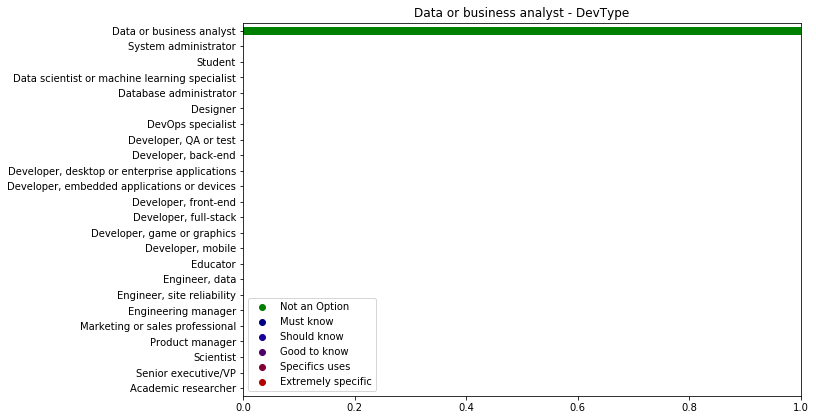

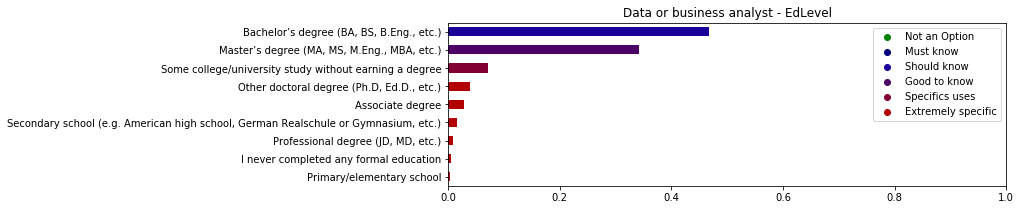

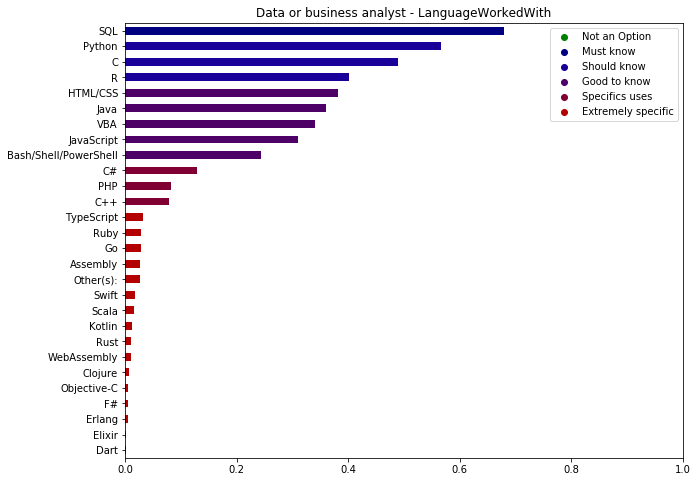

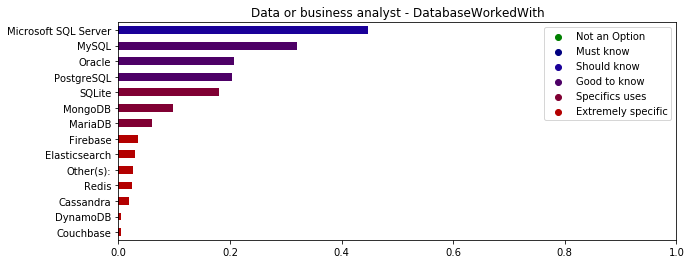

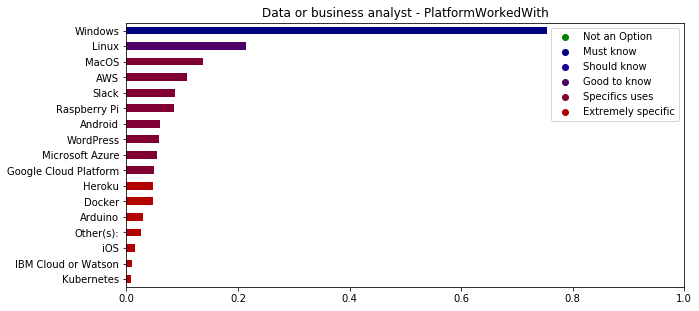

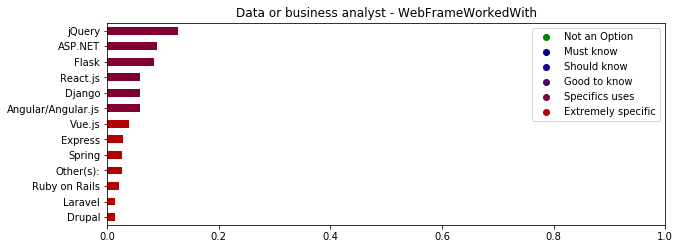

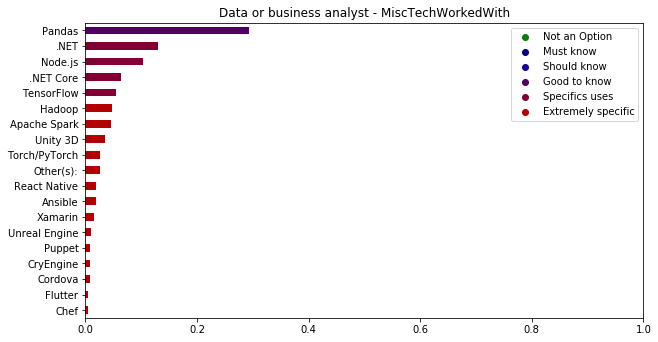

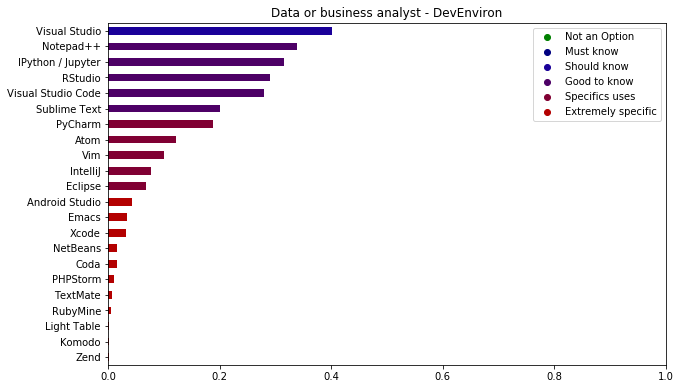

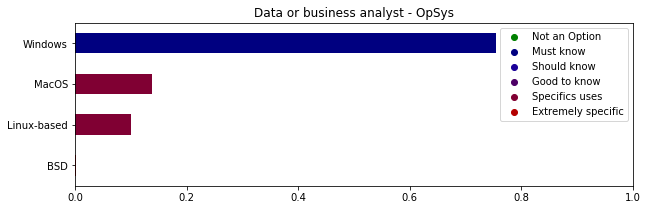

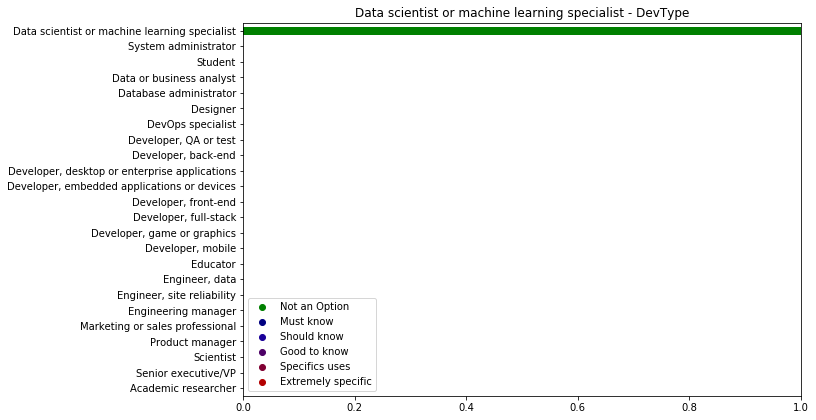

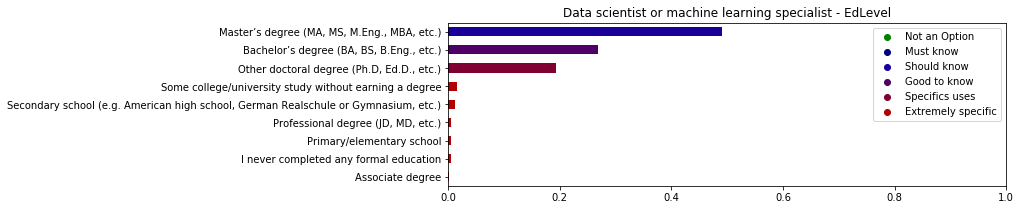

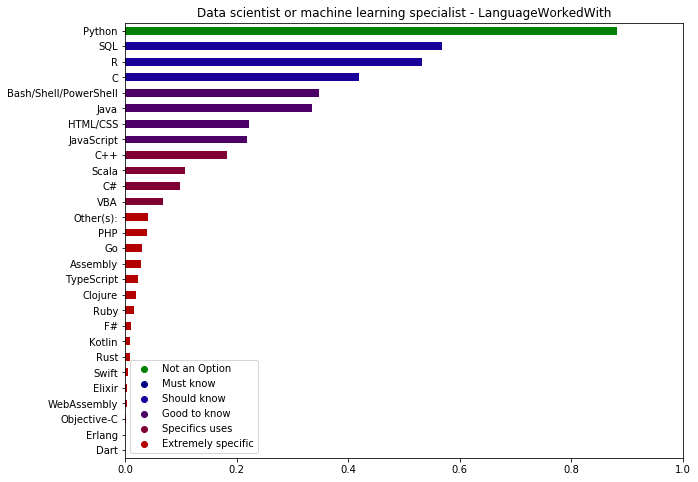

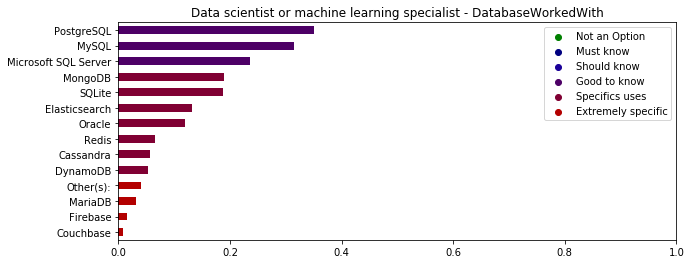

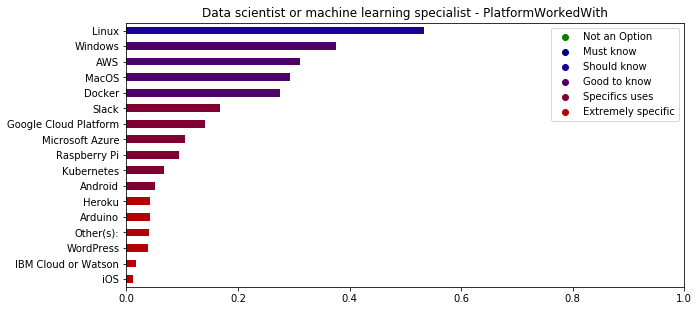

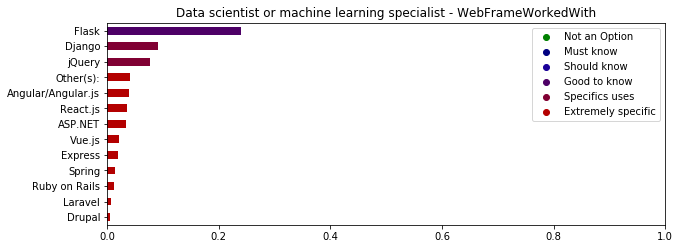

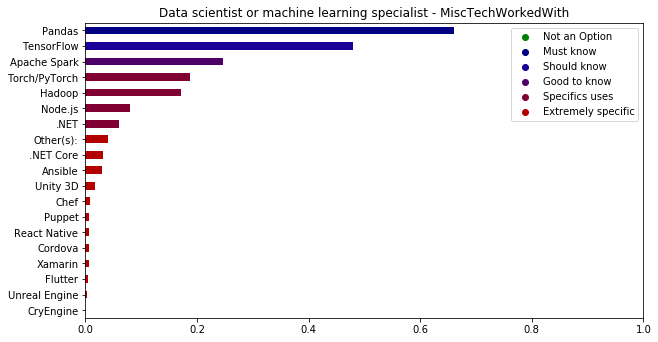

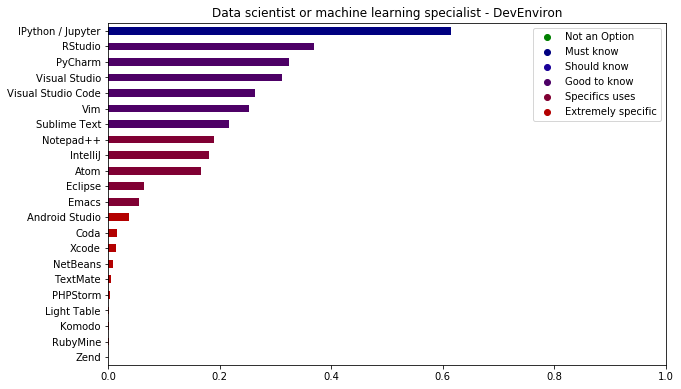

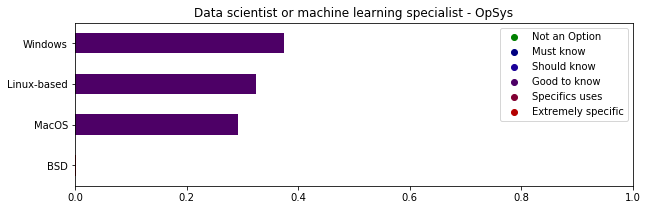

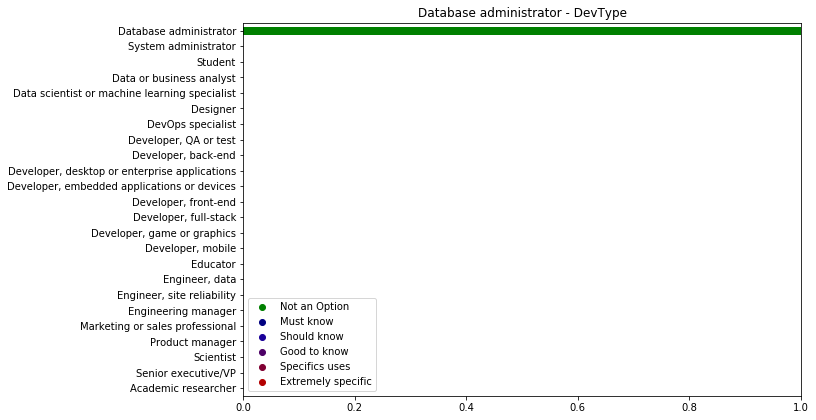

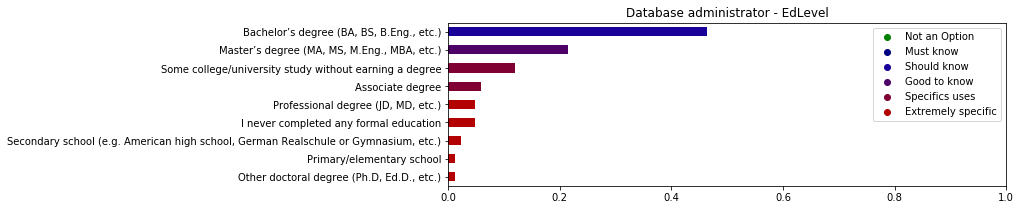

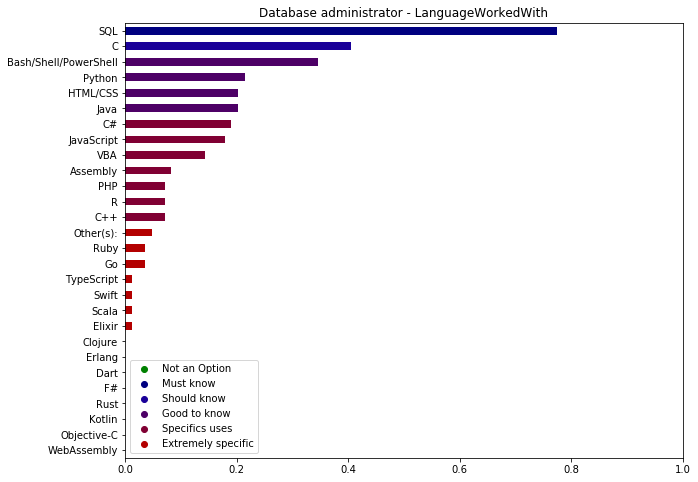

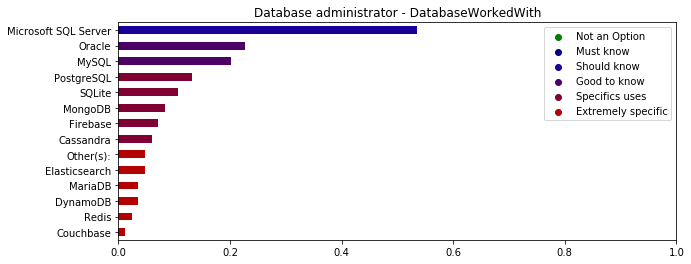

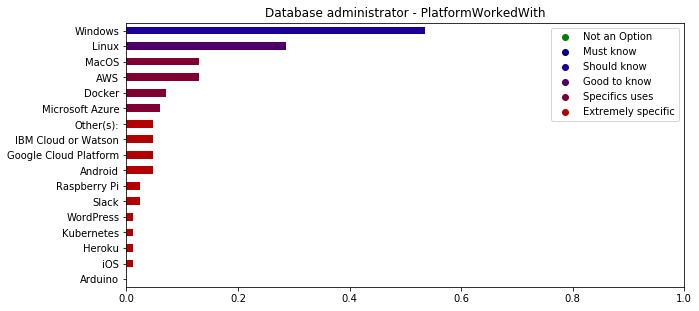

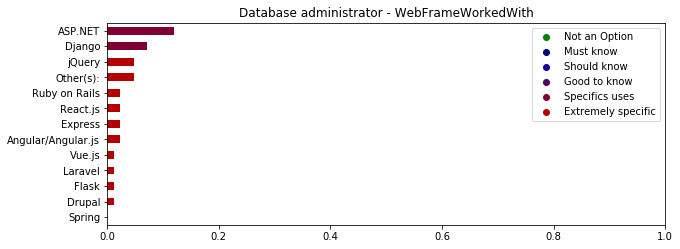

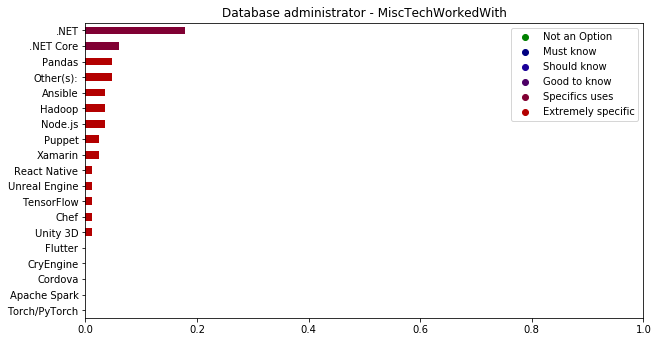

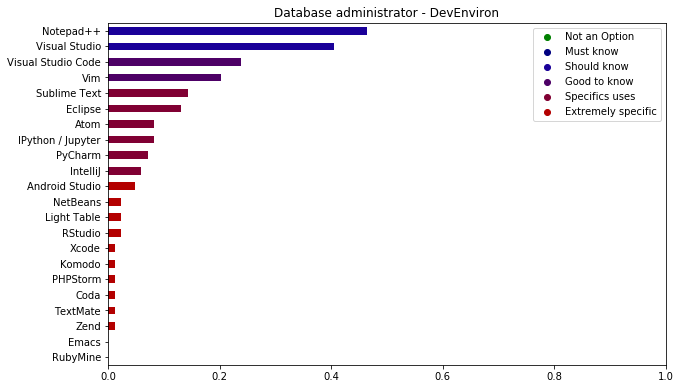

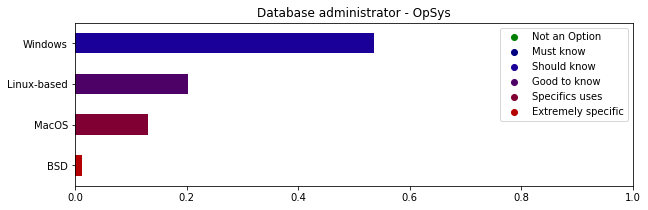

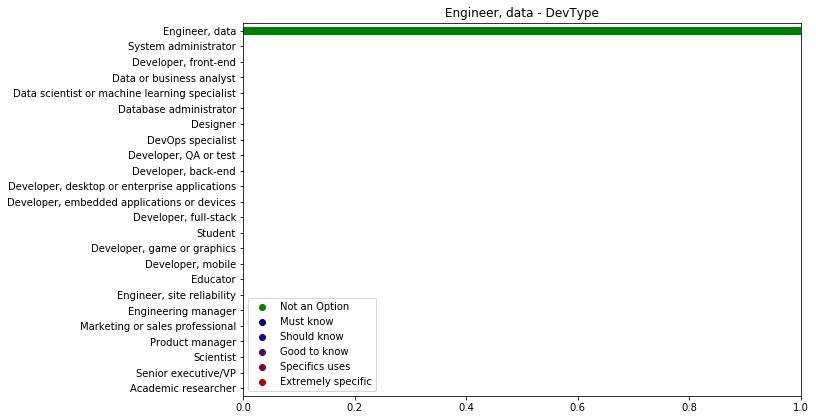

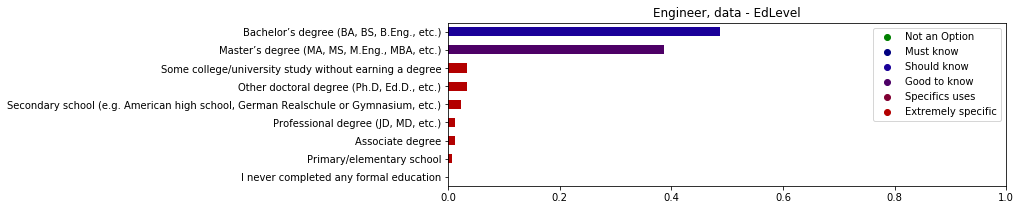

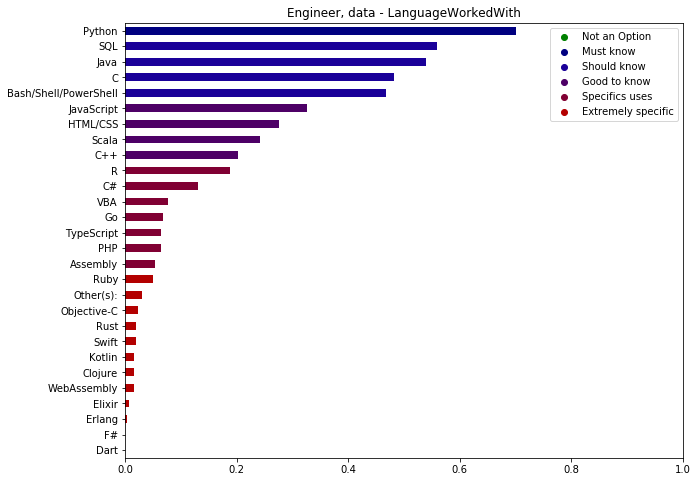

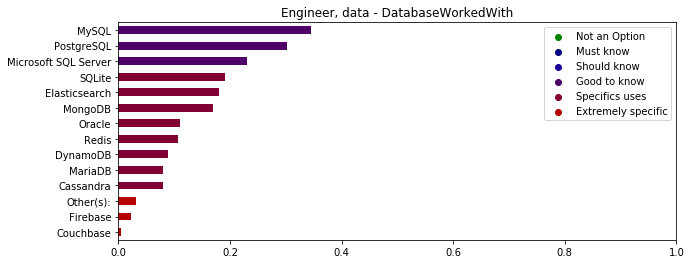

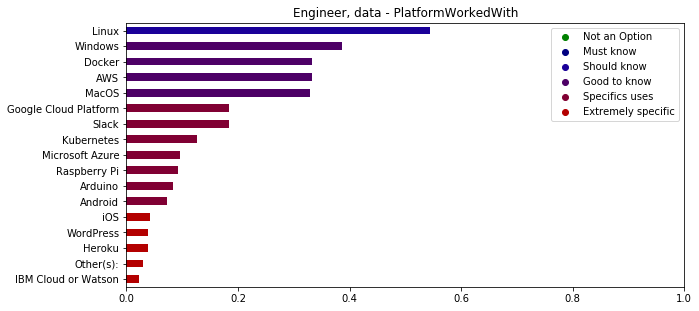

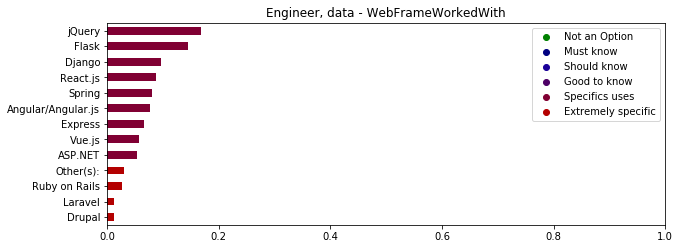

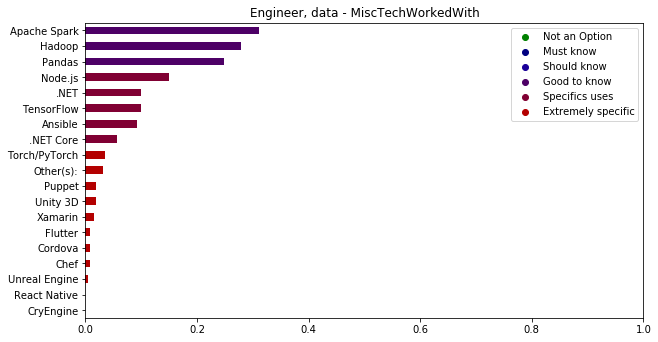

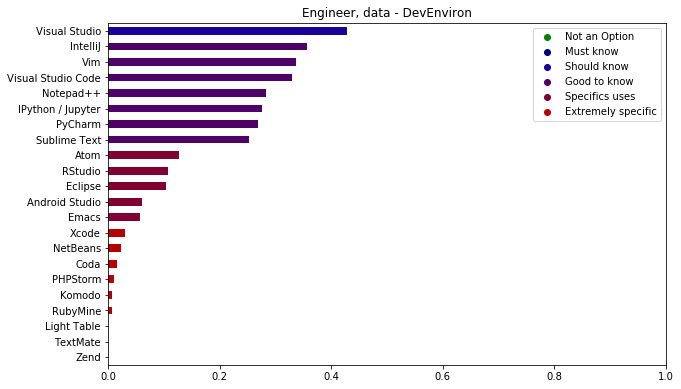

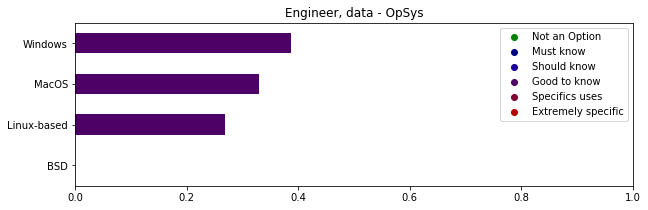

In [47]:
# Micro Segment Plot
for eachOutput in devtype_interest:
    groupedResults = df[df['datajobsCategoryMicro']==eachOutput].groupby(['datajobsCategoryMicro']).mean()
    for skill in columnsOptions:
            groupedSkill = groupedResults.reset_index()[columnsOptions[skill]].transpose().sort_values(0,ascending=True)
            colour = groupedSkill[0].apply(colourMap)
            ysize = groupedSkill.shape[0]/3.5
            groupedSkill.plot.barh(figsize=(10,max(ysize,3)), color=colour)
            plt.title(eachOutput + ' - ' + skill)
            plt.xlim((0,1))
            
            legendPlot_100 = plt.scatter([-1], [-1], color=colourMap(0.90))
            legendPlot_80l = plt.scatter([-1], [-1], color=colourMap(0.70))
            legendPlot_60l = plt.scatter([-1], [-1], color=colourMap(0.50))
            legendPlot_40l = plt.scatter([-1], [-1], color=colourMap(0.30))
            legendPlot_20l = plt.scatter([-1], [-1], color=colourMap(0.10))
            legendPlot_05l = plt.scatter([-1], [-1], color=colourMap(0.04))
            plt.legend((legendPlot_100,legendPlot_80l,legendPlot_60l,legendPlot_40l,legendPlot_20l,legendPlot_05l),
                       ('Not an Option','Must know','Should know','Good to know','Specifics uses','Extremely specific'))
            
            plt.show()


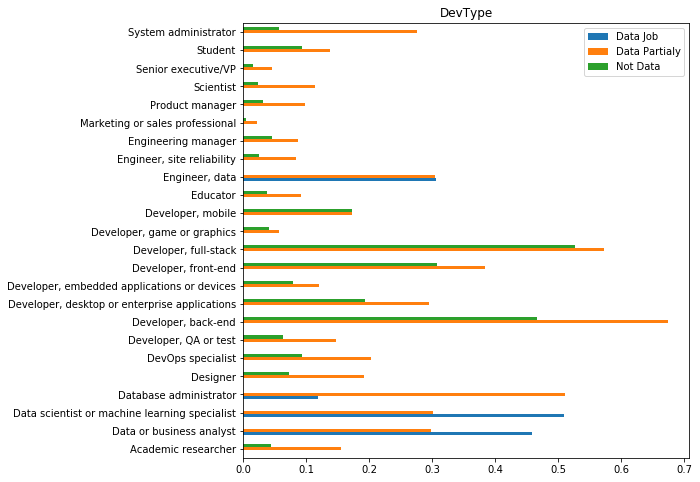

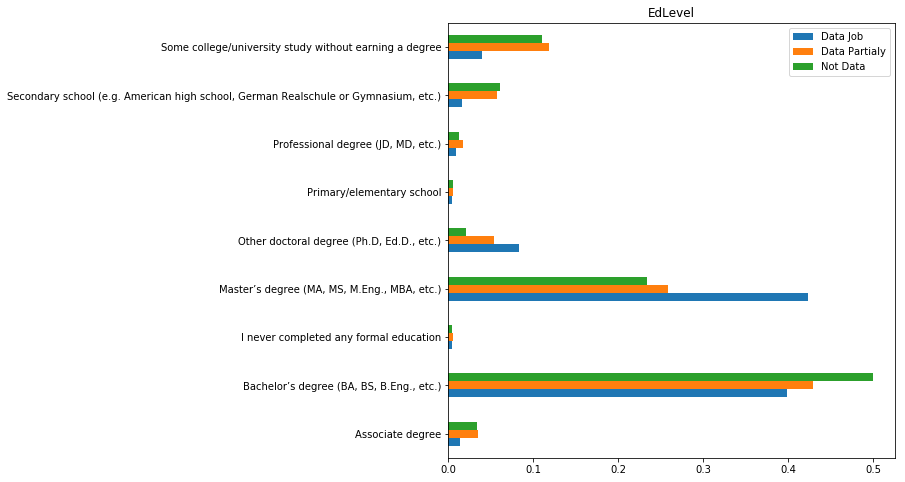

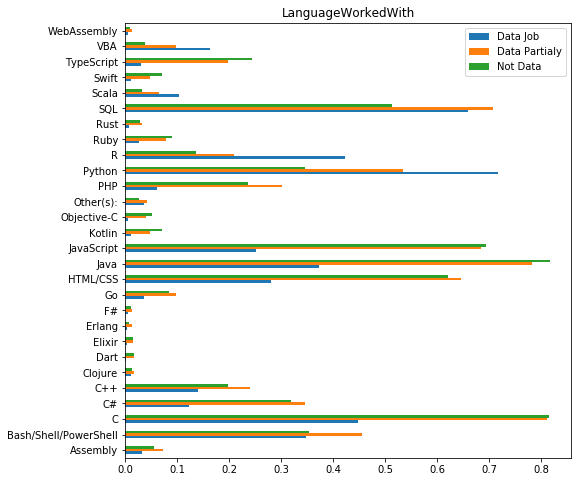

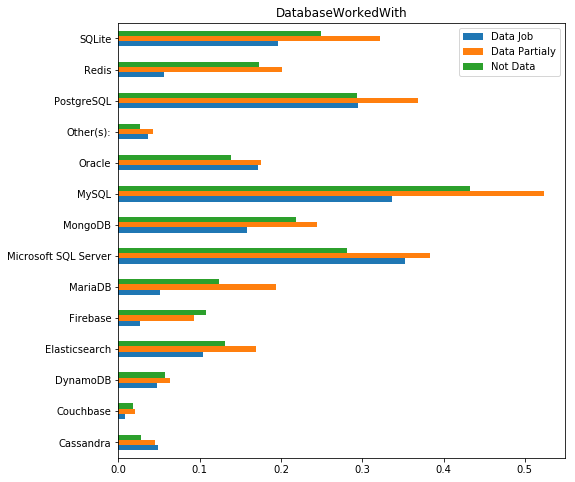

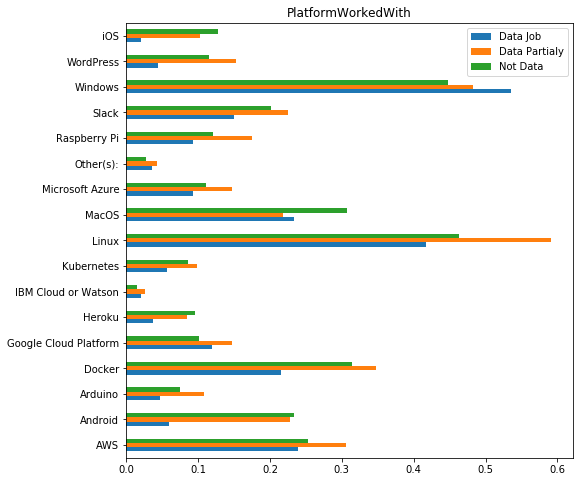

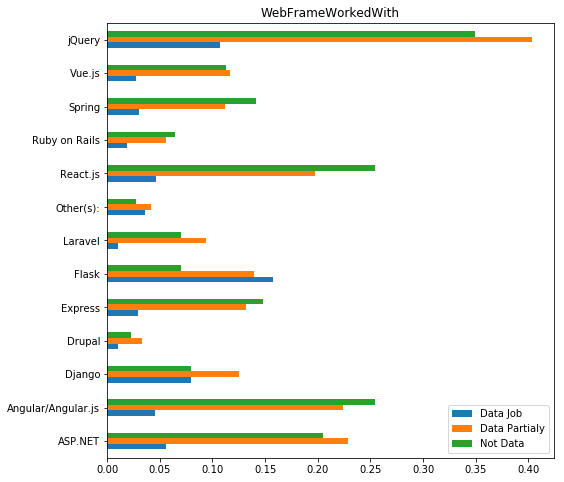

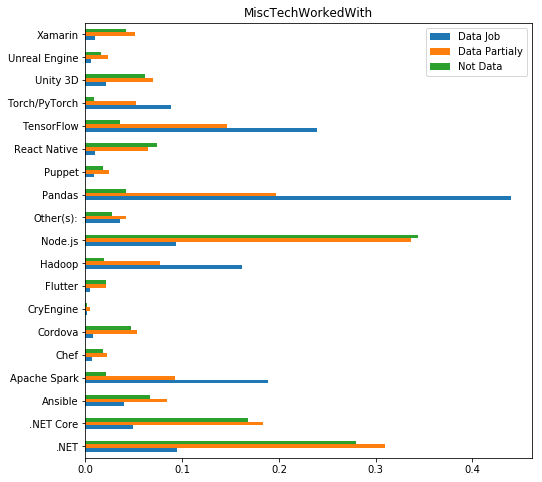

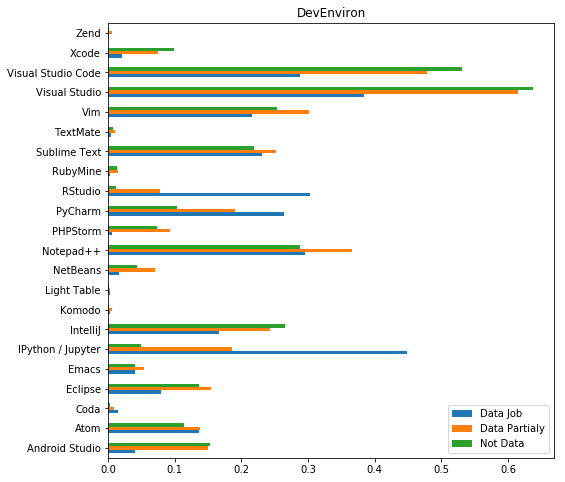

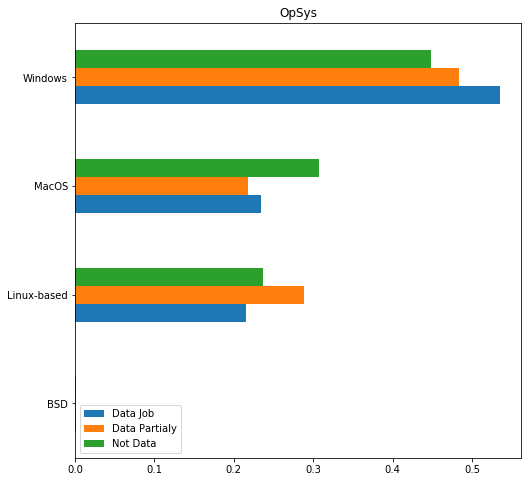

In [48]:
# MACRO SEGMENT PLOT
groupedResults = df.groupby(['datajobsCategoryMacro']).mean()
for skill in columnsOptions:
        groupedResults.reset_index()[columnsOptions[skill]].transpose().plot.barh(figsize=(8,8))
        plt.legend(groupedResults.index)
        plt.title(skill)
        plt.show()


## Question 2: How is the distribution of Salary, for each type of data job in the top 10 countries?

### Transforming Salary
    The salary varies by country, currency, frequency of payment and hours worked. To make an fair metric, we will create the DollarPerHour variable and segment our analysis by country. This way our measurement will be fair.

In [49]:
# Creating feature of dollar paid per Hour
weeksInYear = 52
df['DollarPerHour'] = df['ConvertedComp']/df['WorkWeekHrs']/weeksInYear

# Filtering data Jobs
dfSalary = df[df['datajobsCategoryMacro']=='Data Job']

# Clearing null data
dfSalary = dfSalary.dropna( subset = ['Country','DollarPerHour'])

In [50]:
# Selecting top 5 and Brasil
topCountry = dfSalary['Country'].value_counts().head(5)
countries_list = list(topCountry.index)
countries_list.append('Brazil')

countries_df = dfSalary[dfSalary['Country'].isin(countries_list)]['Country'].value_counts()

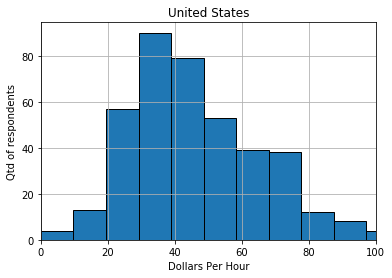

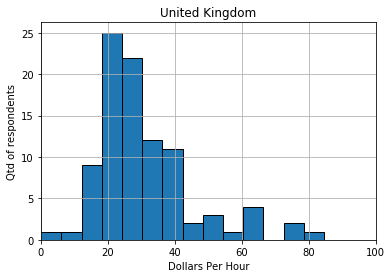

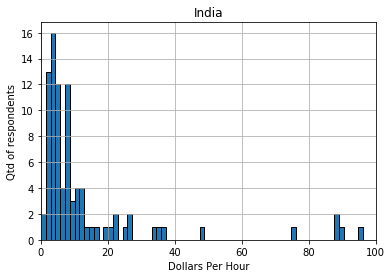

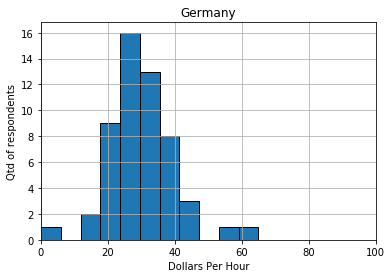

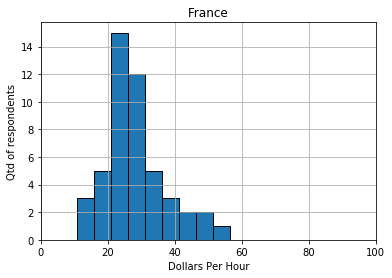

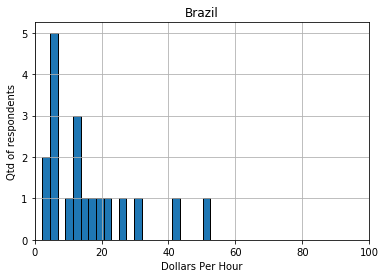

In [51]:
# Prints data jobs income per hour by country
for country in countries_df.index:
    tempdfSalary = dfSalary[dfSalary['Country']==country]['DollarPerHour']
    nbins = 5*tempdfSalary.max()/tempdfSalary.median()
    tempdfSalary.hist(bins=int(nbins), ec='black')
    plt.title(country)
    plt.xlim(0,100)
    plt.xlabel('Dollars Per Hour')
    plt.ylabel('Qtd of respondents')
    plt.show()
    

## Question 3: **How much is worth each skill/technology/education in dollar per hours?**

    Using all the dataset, let understand which skills are more valued.

### Creating Simple Model

In [52]:
# Getting a clean Dataframe and filtering employed
df_model = df_raw[ df_raw['Employment'].isin(['Employed full-time','Employed part-time']) ]

In [53]:
# Filtering for a country, because of cost of living.

# United States, India, Germany, United Kingdom, Canada, France, Brazil,
# Australia, Netherlands, Poland, Spain, Russian Federation, Italy,
# Sweden, Switzerland, Israel, Turkey, Austria, Ukraine

# filterCountry = 'Brazil'
filterCountry = 'United States'

df_model = df_model[df_model['Country']==filterCountry]

In [54]:
# Feature eng.

# Creating feature of dollar paid per Hour
weeksInYear = 52
df_model['DollarPerHour'] = df_model['ConvertedComp']/df_model['WorkWeekHrs']/weeksInYear

#Cleaning null and zeros
df_model = df_model.dropna( subset = ['DollarPerHour'] )
df_model = df_model[df_model['DollarPerHour']!=0]

# Scaling
df_model['DollarPerHourLog'] = np.log10(df_model['DollarPerHour'])

# Transforming The years of code in a numeric variable
df_model['YearsCodeProFix'] = df_model['YearsCodePro'].apply(cleaningYearsOfCode)

In [55]:
modelcolumnsOptions = {}
modelColumnsCategorical =[
    'DevType'
    ,'EdLevel'
    ,'LanguageWorkedWith'
    ,'DatabaseWorkedWith'
    ,'PlatformWorkedWith'
    ,'WebFrameWorkedWith'
    ,'MiscTechWorkedWith'
    ,'DevEnviron'
    ,'OpSys'
]

modelColumns = [
    'YearsCodeProFix' 
]
    
targetColumns = ['DollarPerHour'] # DollarPerHour, DollarPerHourLog

# Creating an dictionary of the columns options
for each in modelColumnsCategorical:
    tempList = getOptionOfMultipleSelection(df_model,each)
    tempList.sort()
    modelcolumnsOptions[each] = tempList

# Creating each skill columns
for each in modelColumnsCategorical:
    df_model = transformingColumnByOptions(df_model, each, columnsOptions[each])
    
# Defining a list of the model feature columns
for eachColumn in modelcolumnsOptions:
    for eachOption in modelcolumnsOptions[eachColumn]:
        modelColumns.append(eachOption)
        
# Filling NA by Medium
df_model = df_model.fillna(df_model.median())

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_model[modelColumns], 
                                                    df_model[targetColumns], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [57]:
model = {}
model['LinearRegression'] = {'model':LinearRegression()}
model['Lasso'] = {'model':Lasso()}
model['DecisionTreeRegressor'] = {'model':DecisionTreeRegressor(min_samples_split=20,max_depth=5)}

In [58]:
for eachModel in model:
    model[eachModel]['model'].fit(X_train, y_train)
    model[eachModel]['predTrain'] = model[eachModel]['model'].predict(X_train)
    model[eachModel]['predTest'] = model[eachModel]['model'].predict(X_test)
    model[eachModel]['trainR2'] = r2_score( y_train, model[eachModel]['predTrain'] )
    model[eachModel]['testR2'] = r2_score( y_test, model[eachModel]['predTest'] )
    model[eachModel]['trainMSE'] = mean_squared_error( y_train, model[eachModel]['predTrain'] )
    model[eachModel]['testMSE'] = mean_squared_error( y_test, model[eachModel]['predTest'] )

In [59]:
# Creating benchmark model
model['Median Model'] = {'model':y_train.median()[0]}
model['Median Model']['predTrain'] = [y_train.median()[0]] * X_train.shape[0]
model['Median Model']['predTest']  = [y_train.median()[0]] * X_test.shape[0]
model['Median Model']['trainR2']   = r2_score( y_train, model['Median Model']['predTrain'] )
model['Median Model']['testR2']    = r2_score( y_test, model['Median Model']['predTest'] )
model['Median Model']['trainMSE']  = mean_squared_error( y_train, model['Median Model']['predTrain'] )
model['Median Model']['testMSE']   = mean_squared_error( y_test, model['Median Model']['predTest'] )

In [60]:
# Printing Results
for eachModel in model:
    print('-------')
    print('Model: %s' % (eachModel) )
    print('R2  train: %.2f  R2  test: %.2f' % (model[eachModel]['trainR2'],model[eachModel]['testR2']))
    print('MSE train: %.2f  MSE test: %.2f' % (model[eachModel]['trainMSE'],model[eachModel]['testMSE']))

-------
Model: LinearRegression
R2  train: 0.01  R2  test: -0.01
MSE train: 79451.31  MSE test: 49296.35
-------
Model: Lasso
R2  train: 0.00  R2  test: 0.00
MSE train: 80262.14  MSE test: 48761.40
-------
Model: DecisionTreeRegressor
R2  train: 0.10  R2  test: -0.01
MSE train: 72480.55  MSE test: 49253.18
-------
Model: Median Model
R2  train: -0.06  R2  test: -0.09
MSE train: 85141.75  MSE test: 52997.32


### Checking for correlation on the knowledge variables

In [61]:
df_target_corr = df_model[targetColumns + modelColumns].corr()[targetColumns].drop(['DollarPerHour'])
df_target_corr['absolute_corr'] = df_target_corr['DollarPerHour'].apply(abs)

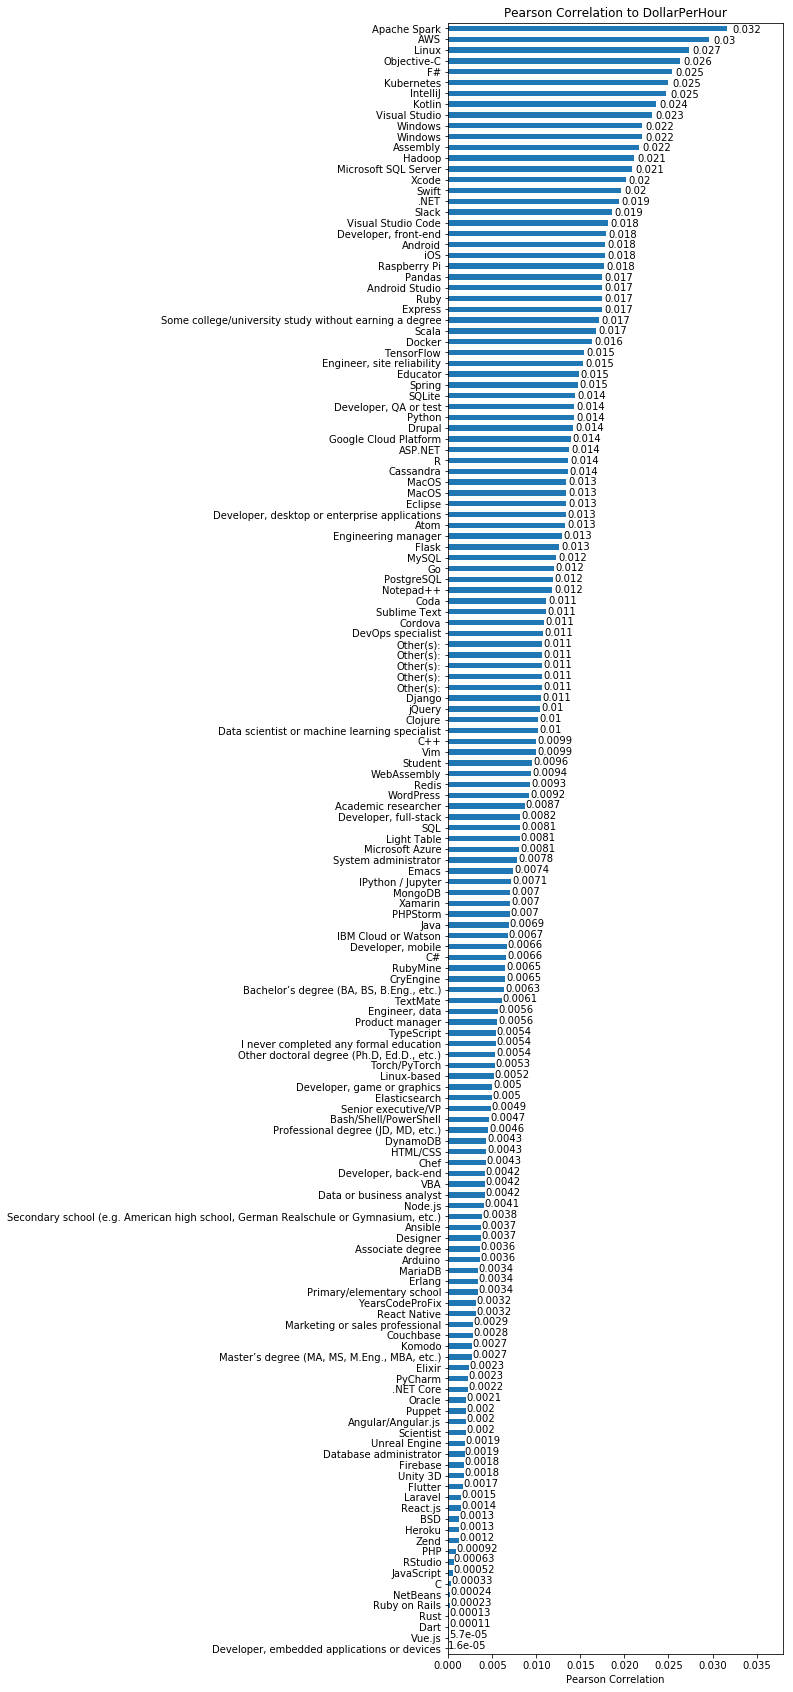

In [62]:
df_plot = df_target_corr.sort_values(by=['absolute_corr'],ascending=True)[['absolute_corr']]
x_size = 6
y_size = 30
df_plot.plot.barh(figsize=(x_size,y_size))
plt.xlim(0,0.038)
plt.xlabel('Pearson Correlation')
plt.title('Pearson Correlation to DollarPerHour')
for index, value in zip( list(range(0,df_plot.shape[0])), list(df_plot['absolute_corr'])):
    plt.text(value*x_size/5.9, 5.02*index*y_size/df_plot.shape[0], format(value, '.2'))
plt.legend().remove()
plt.show()

# Article main Image

This part of the code was used to create the article main image. Just ignore this.

In [63]:
# import Datajobs

# analyst = Datajobs(devtype = 'Data Analyst')

# analyst.learn('python')
# analyst.learn('sql')
# analyst.learn('R')

# analyst.nextsteps('?')

In [64]:
# print('Read this post!')